In [2]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [102]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [103]:
global_model = GlobalDistribution.load(model_path)

In [104]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

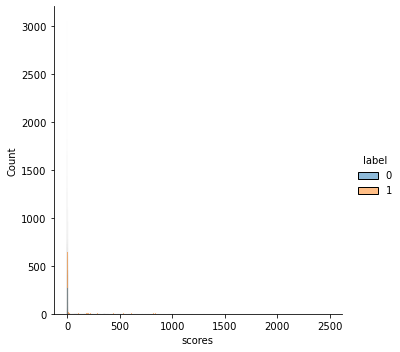

In [105]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [106]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [107]:
decoy_values[0] / decoy_values[1]

0.16843185993731763

In [108]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [109]:
function_check

,label,scores,type
0,-4.620752,0.000243,Target
1,-2.128660,0.040591,Target
2,0.363432,0.080680,Target
3,2.855525,0.047167,Target
4,5.347617,0.040666,Target
...,...,...,...
995,2475.011123,0.000000,Target
996,2477.503215,0.000000,Target
997,2479.995308,0.000000,Target
998,2482.487400,0.000000,Target


In [110]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

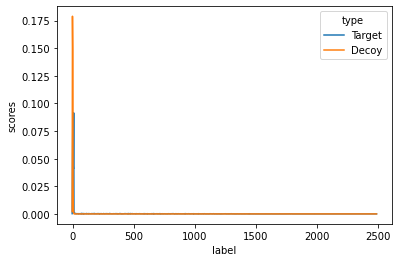

In [111]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [112]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00365282, 0.00589859, 0.00548079, ..., 0.004863  , 0.00512919,
       0.00721529])